## Word Embeddings

Word embeddings - training, usage and visualization


#### Packages

`gensim` was used for word embeddings and `nltk` for some data processing tasks. Also a logger, `matplotlib` for visualisation and `sklearn` for representations.

In [0]:
# import libraries and set up logging
import gensim 
import nltk
import logging
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


##### Dataset: Game of Thrones books

The data used is five volumes of Game of Thrones downloaded from
https://github.com/nihitx/game-of-thrones- 

Basic data cleaning was applied on the raw data to speed up the process.

In [120]:
# Open the file and print the first line
dataFile="got/got.5books.clean.txt"

with open (dataFile, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break


b'"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are dead."\n'


#### Read files into a list `gensim.utils.simple_preprocess(sentence)`




In [121]:
# Write a function `readInput(inputFile)` that reads a file and applies the `simple_preprocess`
def readInput(inputFile):
    """Method to read the input file"""
    
    logging.info("reading file {0}...this may take a while if the file is big".format(inputFile))    
    with open (inputFile, 'rb') as f:
        for i, line in enumerate (f): 
            if (i%10000==0):
                logging.info ("read {0} lines".format (i))
            yield gensim.utils.simple_preprocess(line)

# read the tokenized file into a list (sentences) of lists (tokens) named `sentences`
sentences = list(readInput (dataFile))
logging.info ("Done reading data file")  

# print some examples
print(sentences[2])

['gared', 'did', 'not', 'rise', 'to', 'the', 'bait', 'he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go', 'dead', 'is', 'dead', 'he', 'said', 'we', 'have', 'no', 'business', 'with', 'the', 'dead']


In [122]:
print(sentences[0:15])

[['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead'], ['do', 'the', 'dead', 'frighten', 'you', 'ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile'], ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait', 'he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go', 'dead', 'is', 'dead', 'he', 'said', 'we', 'have', 'no', 'business', 'with', 'the', 'dead'], ['are', 'they', 'dead', 'royce', 'asked', 'softly', 'what', 'proof', 'have', 'we'], ['will', 'saw', 'them', 'gared', 'said', 'if', 'he', 'says', 'they', 'are', 'dead', 'that', 'proof', 'enough', 'for', 'me'], ['will', 'had', 'known', 'they', 'would', 'drag', 'him', 'into', 'the', 'quarrel', 'sooner', 'or', 'later', 'he', 'wished', 'it', 'had', 'been', 'later', 'rather', 'than', 'sooner', 'my', 'mother', 'told', 'me', 'that', 'dead', 'men', 'sing', '

##### Training the Word2Vec model

Instantiate Word2Vec and pass the data, a list (sentences) of lists (tokens) for a complete corpus. Word2Vec uses all these tokens to internally create a vocabulary.

In [0]:
# Define a basic Word2Vec model (gensim.models.Word2Vec) with CBOW and train (model.train) it on `sentences`
model = gensim.models.Word2Vec(sentences, size=300, window=5, min_count=3, workers=2, sg=0)
model.train(sentences,total_examples=len(sentences),epochs=20)

W0821 15:35:48.727262 139628890621824 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(15219163, 20214880)

### What have you trained?
Several functions allow to explore the results. The `most_similar` function returns the top 10 similar words to a given input word. `similarity` returns the similarity between two words that are present in the vocabulary. `doesnt_match` returns the most dissimilar word with a list of words. Let's play with these functions.


In [0]:
# Chose a word to see the 10 closest words
w1 = "throne"
model.wv.most_similar(positive=w1)


[('islands', 0.5923787355422974),
 ('chair', 0.5000112056732178),
 ('fleet', 0.46769919991493225),
 ('tommen', 0.45298463106155396),
 ('rebellion', 0.44182437658309937),
 ('emmett', 0.43945562839508057),
 ('aegon', 0.4384361803531647),
 ('council', 0.43617773056030273),
 ('rightful', 0.43021929264068604),
 ('aerys', 0.4299048185348511)]

In [0]:
w1 = "king"
model.wv.most_similar(positive=w1)

[('baratheon', 0.49426424503326416),
 ('royal', 0.4904899597167969),
 ('realm', 0.48726966977119446),
 ('ninth', 0.4747777283191681),
 ('tourney', 0.4492291808128357),
 ('queen', 0.38735222816467285),
 ('heir', 0.37295055389404297),
 ('kingslayer', 0.3616330623626709),
 ('traitor', 0.35716545581817627),
 ('kingsguard', 0.35368072986602783)]

What happens if the word is not in the vocabulary? We are using a tiny corpus in a specific domain...

In [0]:
# a word that does not belong to the corpus to see the 10 closest words
w1 = ["nigeria"]
model.wv.most_similar(positive=w1,topn=6)


KeyError: ignored

In [0]:
# get everything related to stuff on the bed
w1 = ["bed","sheet","pillow"]
w2 = ["water"]
model.wv.most_similar(positive=w1,negative=w2,topn=10)
#get things that are related in the provided context and provide negative examples to say what should not be considered as related 

[('furs', 0.5944297909736633),
 ('bedrobe', 0.5734661817550659),
 ('clothing', 0.5663654804229736),
 ('robe', 0.5663119554519653),
 ('blankets', 0.5603594779968262),
 ('lap', 0.5413644313812256),
 ('necklace', 0.534493625164032),
 ('bodice', 0.5278222560882568),
 ('unlaced', 0.5267327427864075),
 ('featherbed', 0.5199534296989441)]

In [0]:
model.wv.most_similar(positive=w1,topn=10)

[('blankets', 0.7043177485466003),
 ('furs', 0.6696665287017822),
 ('featherbed', 0.6535866260528564),
 ('bedrobe', 0.638952910900116),
 ('tub', 0.6378033757209778),
 ('blanket', 0.6273938417434692),
 ('cushions', 0.6179920434951782),
 ('robe', 0.6061446666717529),
 ('lap', 0.6049267053604126),
 ('bunk', 0.6012842655181885)]

Calculate some similarities now

In [0]:
# similarity between two different words
model.wv.similarity(w1="king",w2="queen")

0.3873522

In [0]:
# similarity between two different words
model.wv.similarity(w1="water",w2="river")

0.4835567

In [0]:
# similarity between opposite words
model.wv.similarity(w1="dirty",w2="clean")

0.45746067

In [0]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [0]:
# similarity between two unrelated words
model.wv.similarity(w1="bed",w2="cow")

0.228796

#### Find the odd one out


In [0]:
# Define a list of words and look for the strange word
# Which one is the odd one out in this list?
model.wv.doesnt_match(["snow","winter","sword"])

'sword'

In [0]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])


W0821 16:05:06.478376 139628890621824 keyedvectors.py:892] vectors for words {'duvet'} are not present in the model, ignoring these words


'shower'

#### Data processing


Let's see what does stemming, part-of-speech tagging and lemmatisation to our corpus.

### Stemming with Porter Stemmer

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# initialise the stemmer
porterStemmer=PorterStemmer()

In [0]:
# Let's see the first sentence before and after stemming to understand what we are doing
stemSentence=[]
print(sentences[0])
for word in sentences[0]:
    stemSentence.append(porterStemmer.stem(word))
print(stemSentence)
    

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['we', 'should', 'start', 'back', 'gare', 'urg', 'as', 'the', 'wood', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildl', 'are', 'dead']


In [0]:
# It's OK, let's do the whole corpus
# Stem the full corpys
stemmedSentences=[]
for line in sentences:
    stemSentence=[]
    for word in line:
        stemSentence.append(porterStemmer.stem(word))
    stemmedSentences.append(stemSentence)
example=16169
print(sentences[example])
print(stemmedSentences[example])

['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keeping', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']
['she', 'will', 'without', 'highgarden', 'the', 'lannist', 'have', 'no', 'hope', 'of', 'keep', 'joffrey', 'on', 'hi', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'ask', 'she', 'will', 'have', 'no', 'choic', 'but', 'to', 'grant', 'hi', 'request']


### Word embeddings on the stemmed corpus

In [0]:
# Another training with word2vec, now with stems `modelStems`
modelStems = gensim.models.Word2Vec(stemmedSentences, size=100, window=10, min_count=2, workers=2)
modelStems.train(stemmedSentences,total_examples=len(stemmedSentences),epochs=10)

W0821 16:07:31.383610 139628890621824 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(7673218, 10107440)

Explore similarities in `modelStems`

In [0]:
w1 = "throne"
model.wv.most_similar(positive=w1)


[('islands', 0.5923787355422974),
 ('chair', 0.5000112056732178),
 ('fleet', 0.46769919991493225),
 ('tommen', 0.45298463106155396),
 ('rebellion', 0.44182437658309937),
 ('emmett', 0.43945562839508057),
 ('aegon', 0.4384361803531647),
 ('council', 0.43617773056030273),
 ('rightful', 0.43021929264068604),
 ('aerys', 0.4299048185348511)]

In [0]:
w1="sword"
modelStems.wv.most_similar (positive=w1)


[('longsword', 0.7186360955238342),
 ('blade', 0.7075389623641968),
 ('steel', 0.6048089265823364),
 ('hilt', 0.5470588207244873),
 ('spear', 0.5466657876968384),
 ('dagger', 0.5421806573867798),
 ('shield', 0.5275312066078186),
 ('lanc', 0.5139392614364624),
 ('sheath', 0.49219197034835815),
 ('grip', 0.4882340729236603)]

In [0]:
model.wv.most_similar("sword")

[('blade', 0.6832371950149536),
 ('longsword', 0.6669293642044067),
 ('knife', 0.5412535667419434),
 ('spear', 0.4967329204082489),
 ('dagger', 0.4800403118133545),
 ('steel', 0.4737698435783386),
 ('shortsword', 0.4737125039100647),
 ('dirk', 0.46233227849006653),
 ('lance', 0.4561135172843933),
 ('needle', 0.4555854797363281)]

#### Lemmatisation with a WordNet lemmatiser



In [0]:
# Import the package and initialise the lemmatiser
# We need to download Wordnet too
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lemmatiser = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# Let's see the first sentence before and after lemmatising
lemSentence=[]
print(sentences[0])
for word in sentences[0]:
    lemSentence.append(lemmatiser.lemmatize(word))
print(lemSentence)

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['we', 'should', 'start', 'back', 'gared', 'urged', 'a', 'the', 'wood', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']


Are you happy with that? The `lemmatize(word)` function also allow to include information about the PoS of the word `lemmatize(word, PoS)`. Let's us it!

In [0]:
!pip install nltk

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
# Imports needed for PoS tagging
from nltk import pos_tag
from nltk.corpus import wordnet

# You might need to download this
#nltk.download('averaged_perceptron_tagger')

# Write a function to map PoS tag in wordnet to the first letter only
def getWordnetPoS(word):
    """Map POS tag to first character lemmatize() accepts"""
    # WordNet POS tags are only: NOUN = 'n', ADJ = 's', VERB = 'v', ADV = 'r', ADJ_SAT = 'a'

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tagDict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tagDict.get(tag, wordnet.NOUN)

# Tag with PoS the first sentence of the corpus and print it
print(sentences[0])
posSentence=[]
for word in sentences[0]:
    posSentence.append(getWordnetPoS(word))
print(posSentence)

# Lemmatise the full corpus with the information of PoS now
lemSentence=[]
for word in sentences[0]:
    lemSentence.append(lemmatiser.lemmatize(word, getWordnetPoS(word)))
print(lemSentence)

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['n', 'n', 'n', 'r', 'v', 'v', 'n', 'n', 'n', 'v', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'v', 'a']
['we', 'should', 'start', 'back', 'gared', 'urge', 'a', 'the', 'wood', 'begin', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'be', 'dead']


In [0]:
# It's OK, let's lemmatise the whole corpus
lemSentences=[]
for line in sentences:
    lemSentence=[]
    for word in line:
        lemSentence.append(lemmatiser.lemmatize(word, getWordnetPoS(word)))
    lemSentences.append(lemSentence)
print(sentences[example])
print(lemSentences[example])


['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keeping', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']
['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keep', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']


### Word embeddings on the lemmatised corpus

In [0]:
# Another training with word2vec, now with lemmas, create the model `model Lemmas`
modelLemmas = gensim.models.Word2Vec(lemSentences, size=100, window=10, min_count=2, workers=2)
modelLemmas.train(lemSentences,total_examples=len(lemSentences),epochs=10)

W0821 16:16:56.560541 139628890621824 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(7457359, 10107440)

In [0]:
w1 = "throne"
modelLemmas.wv.most_similar(positive=w1)

[('aery', 0.5870214700698853),
 ('rightful', 0.5841408967971802),
 ('conquest', 0.5741870403289795),
 ('justice', 0.5667564272880554),
 ('council', 0.5573984980583191),
 ('law', 0.5555324554443359),
 ('baelor', 0.5528932809829712),
 ('sits', 0.550967812538147),
 ('conqueror', 0.5431686639785767),
 ('rebellion', 0.542667031288147)]

## Visualisation

Finally, we will visualise the _n_-dimensional word embeddings by projecting them down to 2-dimensional x,y coordinate pairs. 
Several techniques exist (PCA, t-SNE, etc). We use PCA in the following (PCA class in `sklearn.decomposition`)

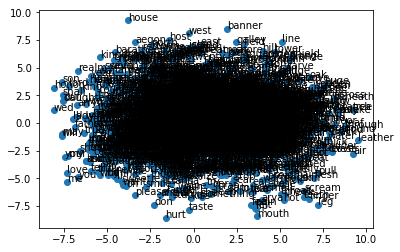

In [0]:
# Imports needed for the visualisation
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

# fit a 2d PCA model to the vectors
X = modelLemmas[modelLemmas.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

# add the labels to the plot
words = list(modelLemmas.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


Too much information. Let's select only a subset of words

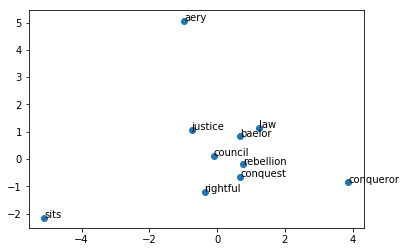

In [0]:
# Select what we wanna see ('most_similar' words to something for instance)
setToPlot = modelLemmas.wv.most_similar(positive='throne', topn=10)

# Look for the vectors for the desired words only, and store them as vectorX and vectorY
vectorX =  []
vectorY =  []
words = []
for word, sim in setToPlot:
    i=modelLemmas.wv.vocab[word].index
    words.append(word)
    vectorX.append(result[i,0])
    vectorY.append(result[i,1])
# create the scatter plot for these words
pyplot.scatter(vectorX, vectorY)

# add the labels
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(vectorX[i], vectorY[i]))
pyplot.show()

We can do many more things, but the best way to learn is parctice by yourself. 

I acknowledge and recommend the following pages:

https://radimrehurek.com/gensim/utils.html

https://radimrehurek.com/gensim/models/word2vec.html